# Introducing Scikit-Learn 
* Scikit-Learn contains solid implementations of various machine learning algorithms
* Clean and uniform API
* Helpful documentation  

### Representing data in Scikit-Learn
Machine learning is about building models for data. But what is a good way to represent data?: __Tables!__  
* Rows: Individual elements of the dataset
* Columns: quantities ralted to an individul element

Consider the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).

![title](images/Petal-sepal.jpg)

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Each row is an observed flower. These rows are called _samples_ and the number of rows is called *n_samples*.  
Likewise, each column contains a quantatative measure which is called *feature*, with the number of features called *n_features*

The table is often called **feature matrix** and by convention it's often named `X`.  
Scikit-Learn assumes the feature matrix to be of shape `[n_samples, n_features]`.

Usually there is also a **target array** of length *n_samples* often named `y`. 

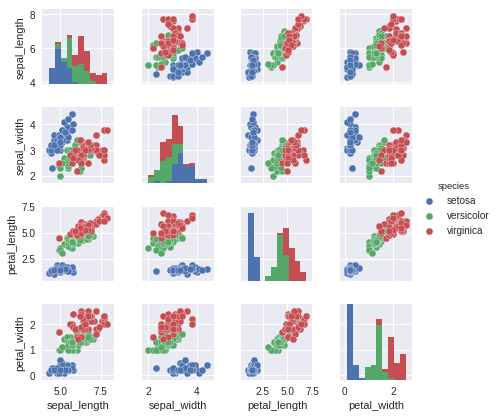

In [3]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);

Let's split the data according to the convention:

In [4]:
X_iris, y_iris = iris.drop('species', axis=1), iris['species']
X_iris.shape, y_iris.shape

((150, 4), (150,))

To summarize, in order to use Scikit-Learn, the data layout should look like this:

![title](images/samples-features.png)

### Basics of the API
Most commonly, the steps in using the Scikit-Learn estimator API are as follows:

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the `fit()` method of the model instance.
5. Apply the Model to new data:
    * For supervised learning, often we predict labels for unknown data using the `predict()` method.
    * For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

### Example: Simple linear Regression
Here is the data:

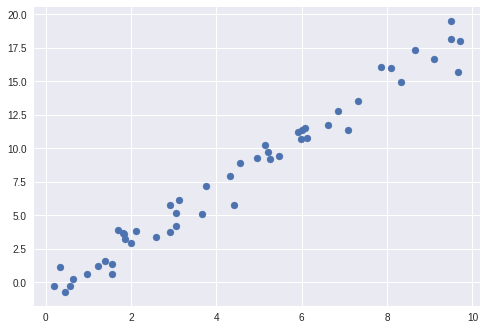

In [5]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)

x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)

plt.scatter(x, y);

**1\. Choose a class of model**  
In Scikit-Learn, every class of model is represented by a Python class. For linear regression we do:

In [6]:
from sklearn.linear_model import LinearRegression

**2\. Model instantiation with hyperparameters**  
For our linear regression example, we can instantiate the LinearRegression class and specify that we would like to fit the intercept using the `fit_intercept` hyperparameter:

In [7]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Other models have different parameters. Refer to the documentation.

**3\. Arrange data into a features matrix and target vector**

In [8]:
X = x[:, np.newaxis]
X.shape

(50, 1)

**4\. Fit the model to your data (i.e. learning)**

In [9]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

This `fit()` command causes a number of model-dependent internal computations to take place.  
The results of these computations are stored in model-specific attributes that the user can explore.  
In Scikit-Learn, by convention all model parameters that were learned during the `fit()` process have trailing underscores.  
For this linear model, we have:

In [10]:
model.coef_

array([ 1.9776566])

In [11]:
model.intercept_

-0.90331072553111458

Comparing to the data definition, we see that they are very close to the input slope of 2 and intercept of -1.

**5\. Predict labels for unknown data**

In Scikit-Learn, the prediction can be done using the `predict()` method.  
For the sake of this example, our "new data" will be a grid of `x` values, and we will ask what `y` values the model predicts:

In [12]:
xfit = np.linspace(-1, 11)

Again, we have to coerce our data into a `[n_samples, n_features]` feature matrix:

In [13]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

Finally, let's visualize the results by plotting first the raw data, and then this model fit:

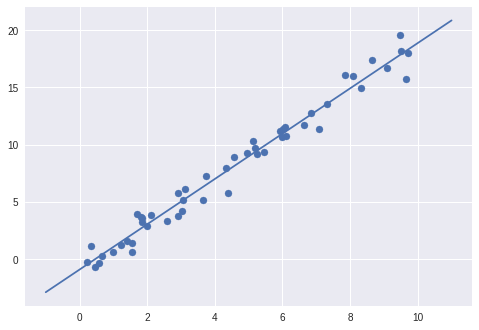

In [14]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

### Training and Test Set
Often the question is this: 
given a model trained on a portion of a given dataset, how well can we predict the remaining labels?  

We would like to evaluate the model on data it has not seen before, and so we will split the data into a **training set** and a **testing set**. This could be done by hand, but it is more convenient to use the `train_test_split` utility function:

In [15]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)
Xtrain.shape, Xtest.shape

((112, 4), (38, 4))